Christian Basso

Fianl Project: Standardized Testing Evaluation

Introduction to Data Science

November 29th, 2023

# Standardized Testing Evaluation

# Research Questions
**Do test preparation courses increase test scores for high school students?**
- Null hypothesis: Test preparation courses do not effect standarized test scores for high school students.
- (Sudents who take test preparation courses will score the same on standardized tests as students who do not take test preparation courses.)
- Alternate Hypothesis: Test preparation courses do effect standarized test scores for high school students.
- (Sudents who take test preparation courses will will score higher on standardized tests than students who do not take test preparation courses.)

**Which school subjects are test preparation courses most effective in improving standardized test scores?**
- Null hypothesis: All subjects will are effected equally by test preparation courses.
- Alternate hypothesis: Test preparation courses are more effective in some subjects than others.

**How well can a students exam performance be predicted through linear regression?**

# Introduction

Standardized testing is a common practice among highschools in the United States. These tests are used to measure student performance and compare schools. The SAT and ACT are among the most common of these tests. Many universities take a students standardized test score into heavy consideration when comparing applicants. There are numerous ways for students to prepare for these exams, the most common being exam preperation courses. These courses aim to increase standardized test scores for math, reading, writiing, and science. The goal of this project is to determine if these courses are effective in increasing standardized test scores for high school students. If these courses are effective, we will also determine which subjects and students benifit most from these courses.

Through visual analysis and statistical testing, this experiment finds that test preparation courses do improve writing and reading scores but do not improve math scores. In turn, these courses do improve a students overall performance on a standardized test. We also found that these courses are most effective in improving writing scores and least effective in math.

Using R-squared as a metric for linear regression accuracy, this dataset does not contain the requite demographic data to accurately predict a students standardized test performance.

The data used in this program is courtesy of Jakki Senshapanpu, a data scientist at kaggle.com. The data was collected from 1000 high school students in the United States. The data includes student test scores, demographic information, and whether or not the student took a test preparation course. The data can be found at https://www.kaggle.com/spscientist/students-performance-in-exams.

This dataset contains demographic information about students (gender, race, parental education, lunch style, exam preparation course) and their standardized test scores in math, reading, and writing.



# Loading the Data and Feature Engneering

In [20]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Gender, race, parental level of education, lunch, and test prep will be made into categorical variables since these columns only have finite unique values.

In [22]:
df.astype({"gender" : "category"})
df.astype({"race/ethnicity" : "category"})
df.astype({"parental level of education" : "category"})
df.astype({"lunch" : "category"})
df.astype({"test preparation course" : "category"})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Lets add an average score column to the data frame.

In [23]:
df['average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.6666666667
1,female,group C,some college,standard,completed,69,90,88,82.3333333333
2,female,group B,master's degree,standard,none,90,95,93,92.6666666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3333333333
4,male,group C,some college,standard,none,76,78,75,76.3333333333
...,...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82,80.3333333333
96,male,group B,some high school,standard,completed,65,66,62,64.3333333333
97,female,group E,some college,standard,completed,63,72,70,68.3333333333
98,female,group D,some college,free/reduced,none,58,67,62,62.3333333333


Within this program, gender, race, parental education, lunch, and test preparation will be used as our indipendent variables. The dependent variable will be one of the test scores, depending on the specific question being investigated.

# EDA

In [24]:
df.describe()

,math score,reading score,writing score,average Score
count,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000
mean,66.0890000000,69.1690000000,68.0540000000,67.7706666667
std,15.1630800960,14.6001919373,15.1956570109,14.2573259847
min,0.0000000000,17.0000000000,10.0000000000,9.0000000000
25%,57.0000000000,59.0000000000,57.7500000000,58.3333333333
50%,66.0000000000,70.0000000000,69.0000000000,68.3333333333
75%,77.0000000000,79.0000000000,79.0000000000,77.6666666667
max,100.0000000000,100.0000000000,100.0000000000,100.0000000000


From this table, we can see that the means of each subject are fairly similar.

# Predictive Variables

For each feature, four boxplots will be made. One comparing a feature to the average score, and one comparing a feature to each of the three test scores. Additionally, chi-squared tests will be used to detirmine a more detailed corelation between the indipenednt and dependent variables. The resulting Pvalues will be put into a table to determine which variables are most predictive of test scores.

The following function makes boxplots for each subject with a spesific feature. This allows us to see the distribution of scores for each subject next to each other.

In [25]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


def create_boxplots(feature_column):
    subjects = ['math score', 'reading score', 'writing score', 'average Score']
    fig, axes = plt.subplots(nrows=1, ncols=len(subjects), figsize=(15, 10))
    
    
    for i, subject in enumerate(subjects):
        sns.boxplot(x=feature_column, y=subject, data=df, ax=axes[i])
        axes[i].set_title(subject)
        axes[i].set_xlabel(feature_column.name)
        axes[i].tick_params(axis='x', rotation=45)
        
    
    fig.suptitle(f'Boxplots for {feature_column}')
    plt.tight_layout()
    
    plt.show()


### Gender vs Scores

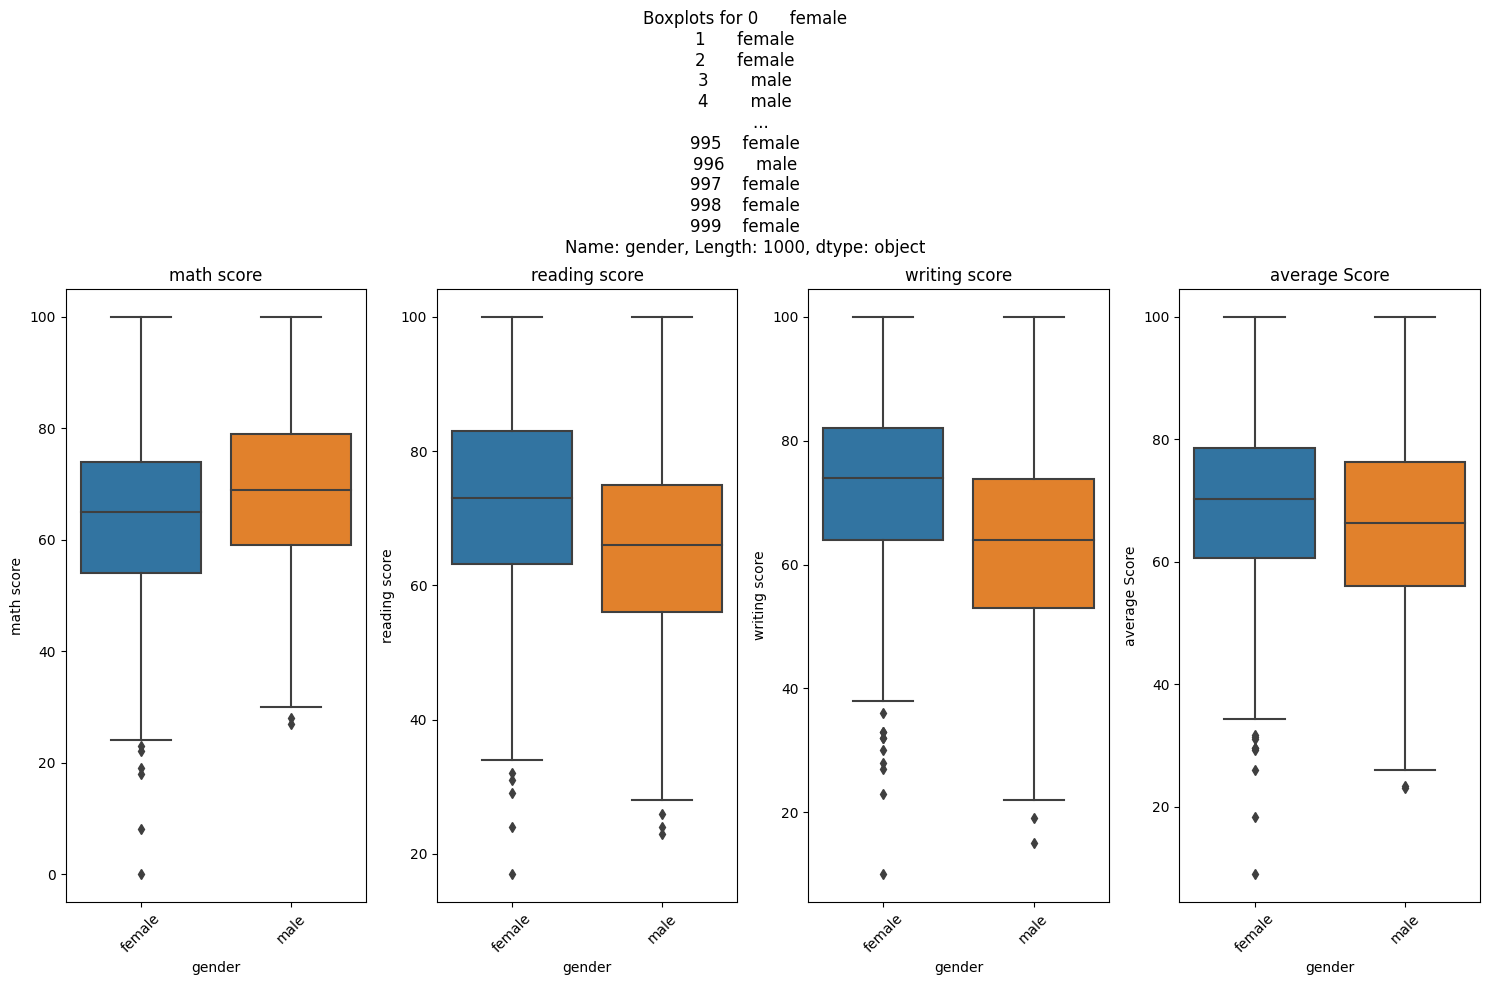

In [26]:
create_boxplots(df["gender"])

These boxplots show qutie a bit of overlap in each subject with each gender. Based on these graphs, one could say that gender is not predictive of exam score. However, the chi-squared test may show relationships that can not be seen visually. The chi-squared tests and boxplots for each feature will be analyzed later in this section.

What is intresting is that, on average, women score better on reading and writing then men, while men had a higher average score in math.

### Race vs Scores

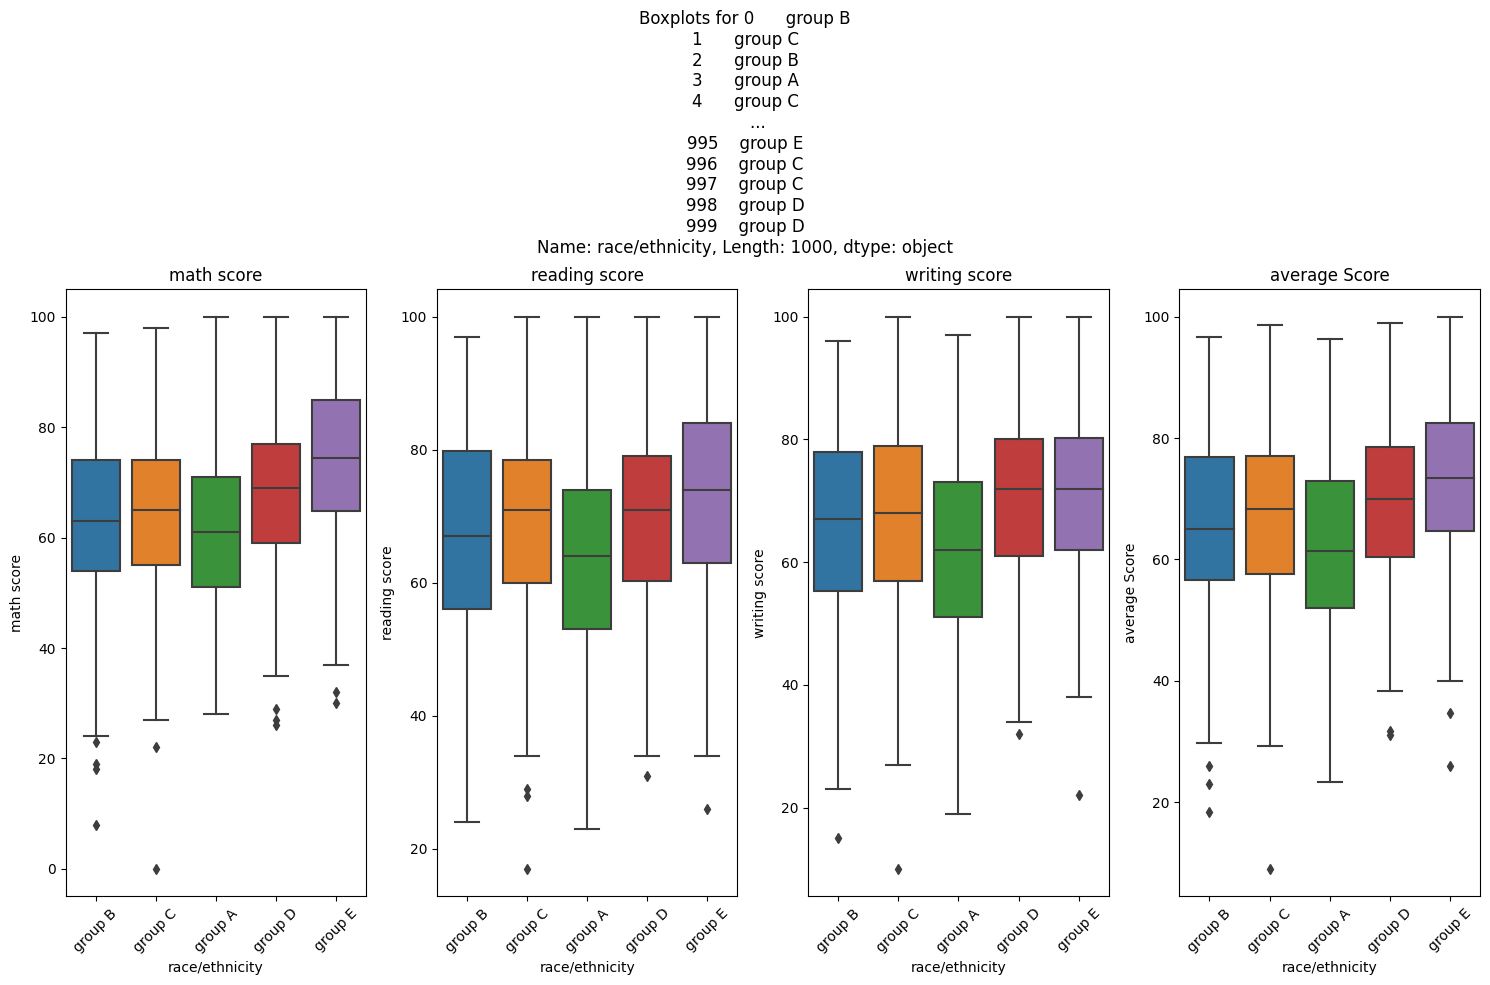

In [27]:
create_boxplots(df["race/ethnicity"])


While ethnicity is not a predictive variable of any subject test score, it is important to note that each of these boxplots follow a similar shape with group E testing the highest and group A testing the lowest.

### Parental Education vs Scores

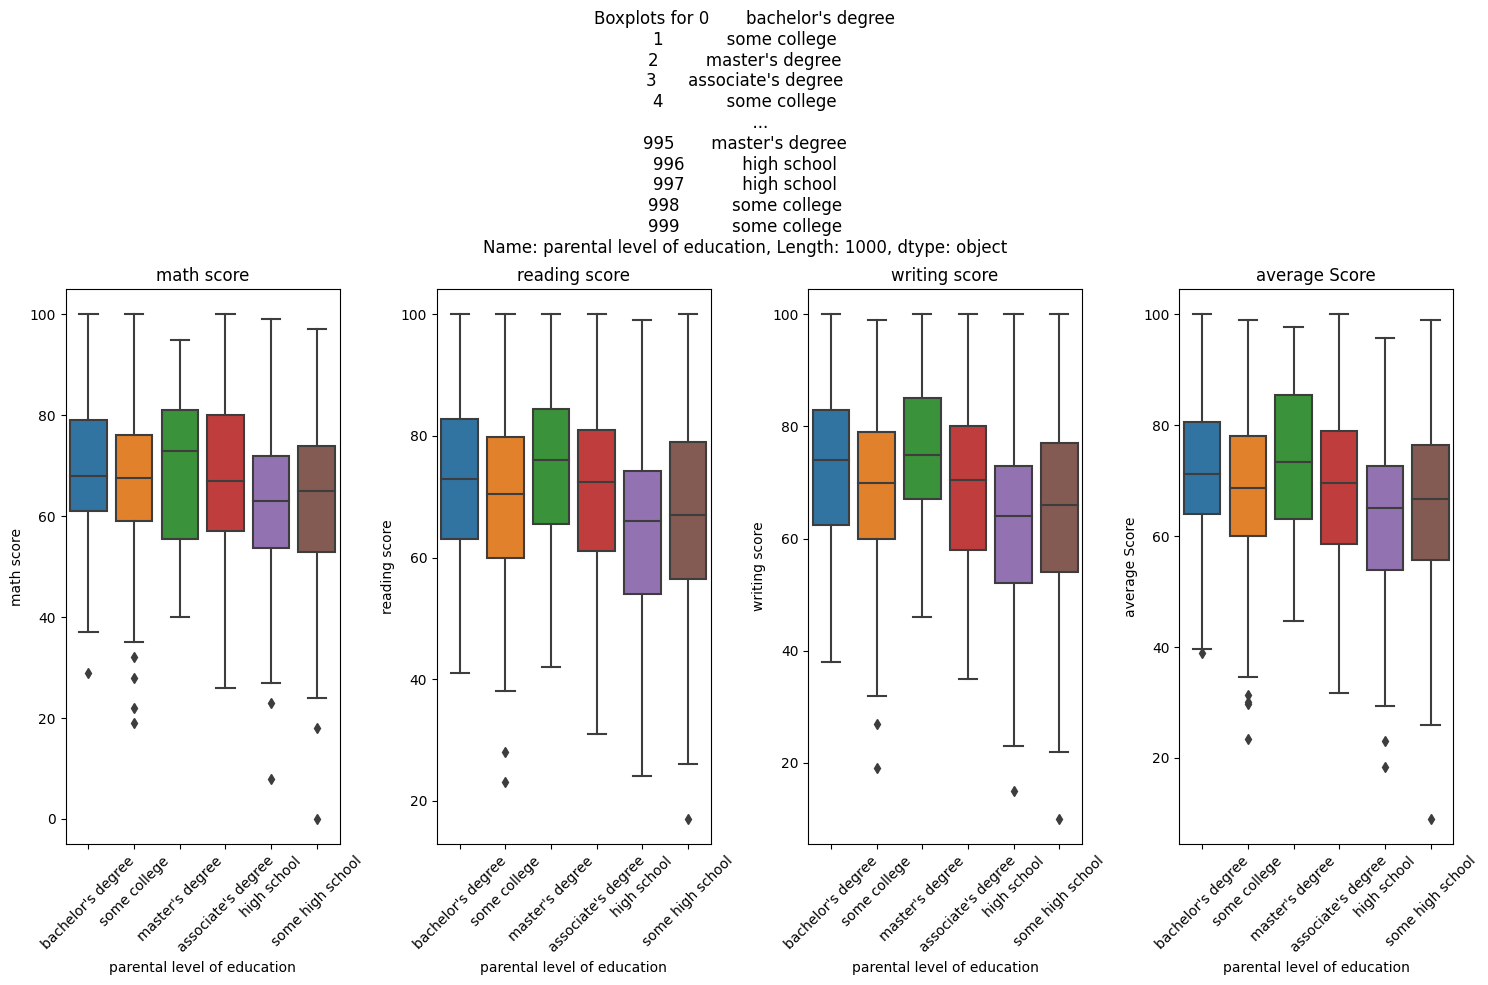

In [28]:
create_boxplots(df["parental level of education"])


The boxplots for parental education show a clear trend of higher parental education leading to higher test scores. This is especially true for math and reading. However, it is important to observe that the "some high school" always tested higher than "full high school". The chi-squared tests will show if this trend is statistically significant.

### Lunch vs Scores

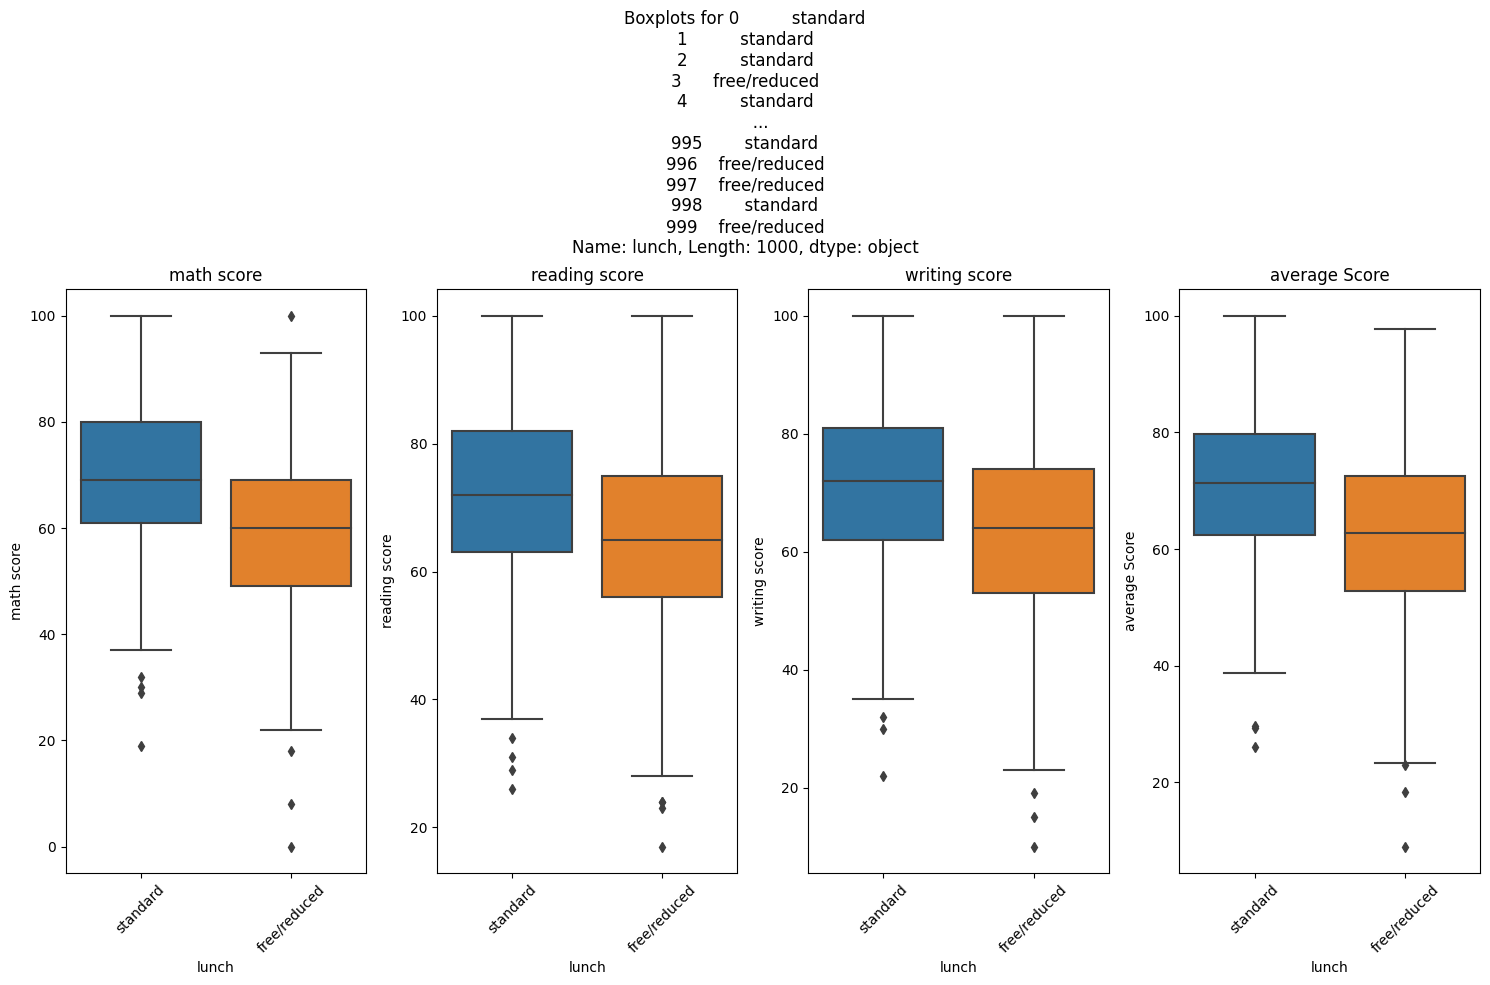

In [29]:
create_boxplots(df["lunch"])

### Test Preparation vs Scores

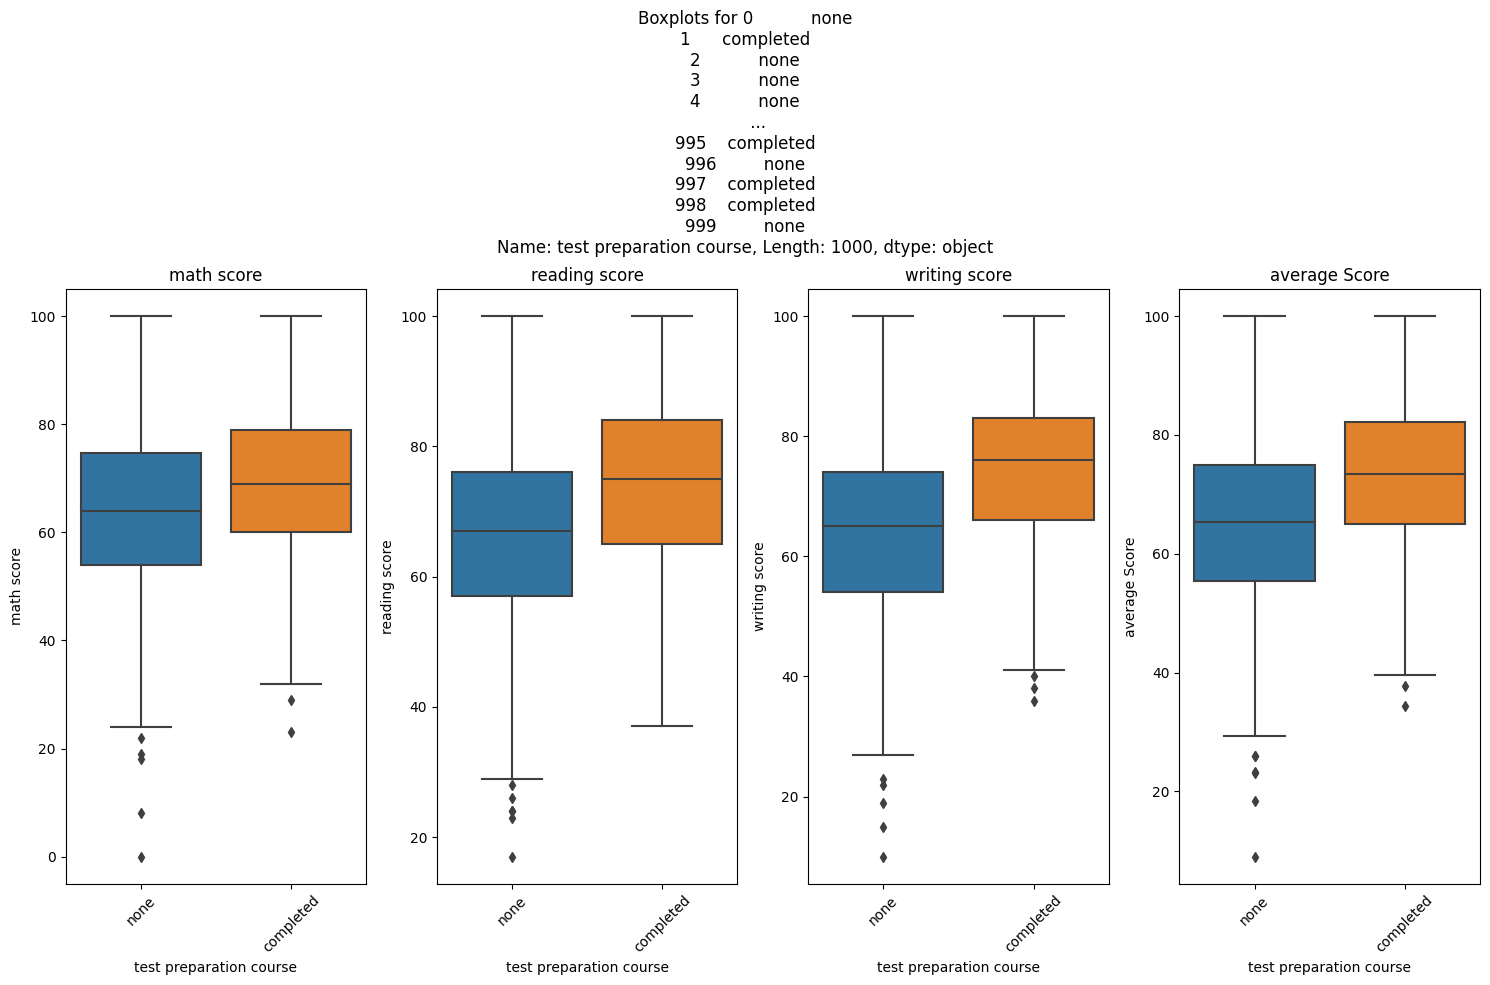

In [30]:
create_boxplots(df["test preparation course"])

The boxplots for test preparation show a clear trend of students who took a test preparation course scoring higher on all three subjects. The chi-squared tests will show if this trend is statistically significant.

## Chi-Squared Test

In [31]:
import scipy.stats as stats
stat_scores = pd.DataFrame(columns = ["Variable", "Math", "Reading", "Writing", "Average Score"])

The following method will take in the indipendent variable column and dependent variable column and return the corresponding Pvalue for the chi-squared test.

In [32]:
def chi_squared(indi):
    dependents = ["math score", "reading score", "writing score", "average Score"]
    pvals = []
    for v in dependents:
        combination_counts = pd.crosstab(indi, df[v])
        chi2, p, _, _ = stats.chi2_contingency(combination_counts)
        pvals.append(p)
    stat_scores.loc[len(stat_scores)] = [indi.name, pvals[0], pvals[1], pvals[2], pvals[3]]
    return p


In [33]:
pd.set_option('display.float_format', '{:.10f}'.format)
features = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for f in features:
    chi_squared(df[f])

stat_scores.head(100)

,Variable,Math,Reading,Writing,Average Score
0,gender,0.1474997263,0.0000014266,0.0000000221,0.3988259596
1,race/ethnicity,0.0675226258,0.0216798584,0.0394590207,0.0538068976
2,parental level of education,0.2682695661,0.2036003913,0.0106288701,0.1659244024
3,lunch,0.0000000005,0.0001566711,0.0003900033,0.0005075964
4,test preparation course,0.2375773120,0.0030452232,0.0000004442,0.0163440509


We will use a standard significance threshold of 0.05. Lets get all the predictive variables for each test score in a table.

In [34]:
sign_table = pd.DataFrame(columns = ["Variable", "Math", "Reading", "Writing", "Average Score"])

sign_table['Math'] = stat_scores['Math'] < 0.05
sign_table['Reading'] = stat_scores['Reading'] < 0.05
sign_table['Writing'] = stat_scores['Writing'] < 0.05
sign_table['Average Score'] = stat_scores['Average Score'] < 0.05
sign_table['Variable'] = stat_scores['Variable']

sign_table.head(100)


,Variable,Math,Reading,Writing,Average Score
0,gender,False,True,True,False
1,race/ethnicity,False,True,True,False
2,parental level of education,False,False,True,False
3,lunch,True,True,True,True
4,test preparation course,False,True,True,True


From this table we can see which features are predicitve of which subject. Note that lunch is a good indicator of all subjects and all features are predictive of writing score.

## Predictive Analysis
While each of the boxplots showed significant overlap between each feature, the high and low end of test scores can be attributed to spesific feature categories. For example, any student who tested below a 40 percent in writing is certain to not have taken the preparation course.This information is represented in the significance table above as well. 

Given this information, we can make an informed guess about the effectiveness of test preparation courses. Based on the pvalue for the test preperation course vs average test score, we can reject the null the hypothesis and say **that test preparation courses are effective in increasing test overall scores.** Additionally, since the Pvalue of the test preparation course vs writing was higher than reading and math subsequentially, the conclusion can be drawn that **test preparation courses are most effective in writing and least effective in math** 

In the next section we will explore how this information on predicive variables can be used in modeling.

# Modeling

The problem in this program is fit for a linear regression model. However, some work must be done on the data to prepare it for modeling.
The binary features (gender, lunch, test prep) will be fine as they are, the sklearn model will just add theit values to the intercept. However, the parental level of education will be a specia case. In the case of categorical variables, one hot encoding would be the usual way of going about correcting the data(ethnicity will be handled this way), but since level of education is ordinal we can just assign each category a numeric value and treat the continuous.

So, lets add a numeric representation of parental education to the data frame.

In [35]:
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

df["parental_numeric"] = df["parental level of education"].map(education_mapping)

df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average Score,parental_numeric
0,female,group B,bachelor's degree,standard,none,72,72,74,72.6666666667,5
1,female,group C,some college,standard,completed,69,90,88,82.3333333333,3
2,female,group B,master's degree,standard,none,90,95,93,92.6666666667,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3333333333,4
4,male,group C,some college,standard,none,76,78,75,76.3333333333,3
...,...,...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82,80.3333333333,4
96,male,group B,some high school,standard,completed,65,66,62,64.3333333333,1
97,female,group E,some college,standard,completed,63,72,70,68.3333333333,3
98,female,group D,some college,free/reduced,none,58,67,62,62.3333333333,3


*Each model will use average score as the target variable*

Given that there are 5 features, there are 32 different combinations of features. This means that there are 32 different linear regression models that can be made (with keeping the same order). Lets make every model we can and see which one has the best accuracy. We will be using ajusted R-squared as a metric for accuracy.

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools
from sklearn.metrics import r2_score

In [37]:
import numpy as np
# Create a list of feature combinations
features = ['gender', 'lunch', 'test preparation course', 'parental_numeric']

df_selected = df[features].copy()
df_selected = pd.concat([df_selected, pd.get_dummies(df['race/ethnicity'], prefix='race')], axis=1)
df_selected['average Score'] = df['average Score']
df_selected['gender'] = df_selected['gender'].map({'male': 0, 'female': 1})
df_selected['lunch'] = df_selected['lunch'].map({'standard': 0, 'free/reduced': 1})
df_selected['test preparation course'] = df_selected['test preparation course'].map({'none': 0, 'completed': 1})
#features.append(["race_group A", "race_group B", "race_group C", "race_group D", "race_group E"])
features.append("race/ethnicity")

# Generate all possible combinations of features
combinations = []
for r in range(1, len(features) + 1):
    combinations.extend(list(itertools.combinations(features, r)))

new_combinations = []

for i in combinations:
    new_sublist = []
    for j in i:
        if j == "race/ethnicity":
            new_sublist.append("race_group A")
            new_sublist.append("race_group B")
            new_sublist.append("race_group C")
            new_sublist.append("race_group D")
            new_sublist.append("race_group E")
        else:
            new_sublist.append(j)
    new_combinations.append(new_sublist)

combinations = new_combinations

In [38]:
# Create a dataframe to store the models and adjusted R-squared values
model_results = pd.DataFrame(columns=['Features', "Num Features", 'Model', 'Adjusted R-squared'])


# Iterate over each feature combination
for combination in combinations:
    if len(combination) != 1:
        # Fit the linear regression model
        
        X = df_selected[list(combination)]
        
        y = df_selected['average Score']
        model = LinearRegression()
        model.fit(X, y)
        
        # Calculate the adjusted R-squared value
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        n = X.shape[0]
        p = X.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        
        # Add the model and adjusted R-squared value to the dataframe
        model_results.loc[len(model_results)] = [combination, len(combination), model, adj_r2]

# Sort the dataframe by adjusted R-squared value in descending order
model_results = model_results.sort_values(by='Adjusted R-squared', ascending=False)

# Print the models and adjusted R-squared values
model_results.head(100)


,Features,Num Features,Model,Adjusted R-squared
26,"[gender, lunch, test preparation course, paren...",9,LinearRegression(),0.2313870981
25,"[lunch, test preparation course, parental_nume...",8,LinearRegression(),0.2146271367
21,"[gender, lunch, test preparation course, paren...",4,LinearRegression(),0.2122950750
17,"[lunch, test preparation course, parental_nume...",3,LinearRegression(),0.1962456306
22,"[gender, lunch, test preparation course, race_...",8,LinearRegression(),0.1939175712
18,"[lunch, test preparation course, race_group A,...",7,LinearRegression(),0.1735293365
11,"[gender, lunch, test preparation course]",3,LinearRegression(),0.1693818219
23,"[gender, lunch, parental_numeric, race_group A...",8,LinearRegression(),0.1634003054
5,"[lunch, test preparation course]",2,LinearRegression(),0.1509197679
19,"[lunch, parental_numeric, race_group A, race_g...",7,LinearRegression(),0.1472304794


## Model Analysis

We can see from the table above that none of the models are accurate, the top perfroming model has an adjusted R-squared of 0.23. Note that the best performing model was the model with all the features. 

But given how poorly all these models performed, we can say that **student exam performance can not be accurately predicted using (this) demographic data**.

# Conclusion

This program aimed to analyze the effetiveness of standardized test preperation courses for highschool students. We tested to see if exam preparation courses improved the students test scores in individual subjects and as a whole. As a result, we tested to see if exam preparation courses were more effective in specific subjects. Additionally, we used linear regression to see if a students test score could be accuratly predicted by demographic data.

We found that test preparation courses do improve writing and reading scores but do not improve math scores. In turn, these courses do improve a students overall performance on a standardized test. Through chi-squared statistical testing, we found that these courses are most effective in improving writing scores and least effective in math.

Additonally, the demographic data within this dataset is not requiste to accuratly predict a students exam performance. A model might need additional data such as school performance ranking, GPA, and year of education.

# Assignent Analysis
**Lessons learned:** 
- Don't assume a model will work before you train it, instead make infrences about the data and if it hold enough information to even make a model in the first place.
- Write out a "data" map before you do anything with the features. This will help you understand how the data is layed out and predict how your code will handle each feature (especially in modeling).
- Linear regression is super fast!

**Assigment Recommendations:**
- Recommend a problem that requires kfold cross validation and more advanced topics we learned. I chose this "bread and butter" problem thinking it would be a good culmination of everything I learned thus far. However, it was basically a lab with no write up.